In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
# Read the dataset

df = pd.read_csv('bank_additional_full.csv')

In [3]:
# Print the dataset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

###### Here we can see that there is no null value

###### Now, Count the value of each column so we can see that is there any unkown value in the column or not

In [6]:
# Here age column has all numeric value and using df.info() function we found above that thare is no NaN.

#age_counts = df['age'].value_counts()
#print(age_counts)

In [7]:
# Using value_counts() we can find out that how may unknown job column has

job_counts = df['job'].value_counts()
print(job_counts)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [8]:
# Using value_counts() we can find out that how may unknown marital column has

marital_counts = df['marital'].value_counts()
print(marital_counts)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [9]:
# Using value_counts() we can find out that how may unknown education column has

education_counts = df['education'].value_counts()
print(education_counts)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [10]:
# Using value_counts() we can find out that how may unknown default column has

default_counts = df['default'].value_counts()
print(default_counts)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [11]:
# Using value_counts() we can find out that how may unknown housing column has

housing_counts = df['housing'].value_counts()
print(housing_counts)

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


In [12]:
# Using value_counts() we can find out that how may unknown loan column has

loan_counts = df['loan'].value_counts()
print(loan_counts)

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


In [13]:
# Using value_counts() we can find out that how may unknown contact column has and there is no unown value

contact_counts = df['contact'].value_counts()
print(contact_counts)

cellular     26144
telephone    15044
Name: contact, dtype: int64


In [14]:
# Using value_counts() we can find out that how may unknown month column has and there is no unown value

month_counts = df['month'].value_counts()
print(month_counts)

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


In [15]:
# Using value_counts() we can find out that how may unknown day column has and there is no unown value

day_of_week_counts = df['day_of_week'].value_counts()
print(day_of_week_counts)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


In [16]:
# Here duration column has all numeric value and using df.info() function we found above that thare is no NaN.

#duration_counts = df['duration'].value_counts()
#print(duration_counts)

In [17]:
# Here campaign column has all numeric value and using df.info() function we found above that thare is no NaN.

#campaign_counts = df['campaign'].value_counts()
#print(campaign_counts)

In [18]:
# Here pdays column has all numeric value and using df.info() function we found above that thare is no NaN.

#pdays_counts = df['pdays'].value_counts()
#print(pdays_counts)

In [19]:
# Here previous column has all numeric value and using df.info() function we found above that thare is no NaN.

#previous_counts = df['previous'].value_counts()
#print(previous_counts)

In [20]:
# Using value_counts() we can find out that how may unknown poutcome column has and there is no unown value

poutcome_counts = df['poutcome'].value_counts()
print(poutcome_counts)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [21]:
# Here emp_var_rate column has all numeric value and using df.info() function we found above that thare is no NaN.

#emp_var_rate_counts = df['emp_var_rate'].value_counts()
#print(emp_var_rate_counts)

In [22]:
# Here cons_price_idx column has all numeric value and using df.info() function we found above that thare is no NaN.

#cons_price_idx_counts = df['cons_price_idx'].value_counts()
#print(cons_price_idx_counts)

In [23]:
# Here cons_conf_idx column has all numeric value and using df.info() function we found above that thare is no NaN.

#cons_conf_idx_counts = df['cons_conf_idx'].value_counts()
#print(cons_conf_idx_counts)

In [24]:
# Here euribor3m column has all numeric value and using df.info() function we found above that thare is no NaN.

#euribor3m_counts = df['euribor3m'].value_counts()
#print(euribor3m_counts)

In [25]:
# Here nr_employed column has all numeric value and using df.info() function we found above that thare is no NaN.

#nr_employed_counts = df['nr_employed'].value_counts()
#print(nr_employed_counts)

In [26]:
# Using value_counts() we can find out that how may unknown y column has and there is no unown value

y_counts = df['y'].value_counts()
print(y_counts)

False    36548
True      4640
Name: y, dtype: int64


##### Correlation Matrix

In [27]:
df.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

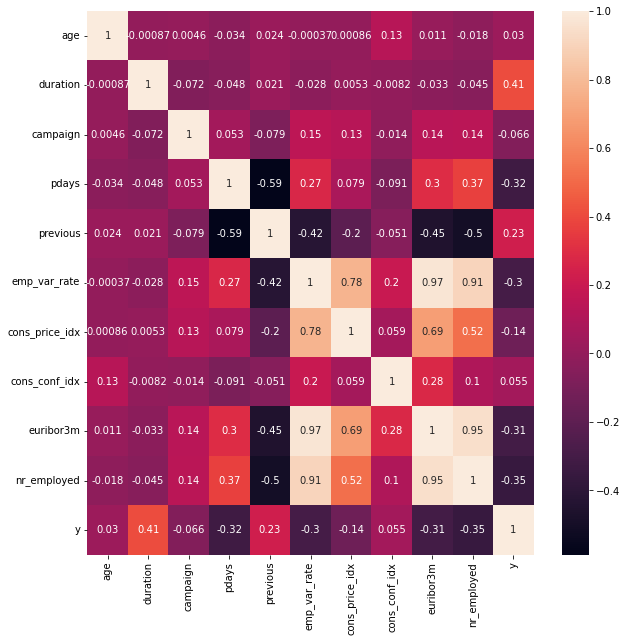

In [28]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

##### Here job, marital, education, default, housing, loan have unknown values we will drop that rows except default column because it hase more unkown values

In [29]:
df = df[(df.job != 'unknown')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [30]:
df = df[(df.marital != 'unknown')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [31]:
df = df[(df.education != 'unknown')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [32]:
df = df[(df.housing != 'unknown')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [33]:
df = df[(df.loan != 'unknown')]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


##### For default column

In [34]:
default_counts = df['default'].value_counts()
print(default_counts)

no         30485
unknown     7757
yes            3
Name: default, dtype: int64


In [35]:
# There is only 3 yes values so we can replace unknown values with no
df['default'] = df['default'].replace(['unknown'],'no')

In [36]:
default_counts = df['default'].value_counts()
print(default_counts)

no     38242
yes        3
Name: default, dtype: int64


In [37]:
df.shape

(38245, 21)

In [38]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [39]:
df.to_csv('prince.csv')

In [40]:
y_counts = df['y'].value_counts()
print(y_counts)

False    33987
True      4258
Name: y, dtype: int64


### Normalize data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         38245 non-null  object 
 5   housing         38245 non-null  object 
 6   loan            38245 non-null  object 
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp_var_rate    38245 non-null  float64
 16  cons_price_idx  38245 non-null  float64
 17  cons_conf_idx   38245 non-null 

In [42]:
# For the normalization just remove the columns with string value later on we can add that row
temp_df1 = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)
temp_df1

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [43]:
temp_df2 = df.drop(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'], axis=1)
temp_df2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,False
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,False
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,False
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,False
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,False
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,True
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,False
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,False
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,True


#### Min-Max

In [44]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = temp_df1.columns
d = scaler.fit_transform(temp_df1)
df_MinMax = pd.DataFrame(d, columns=names)
df_MinMax

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


In [45]:
df_MinMax.shape

(38245, 10)

In [46]:
df_MinMax = pd.concat([df_MinMax, temp_df2.reindex(df_MinMax.index)], axis=1)
df_MinMax

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,False
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,False
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,False
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,False
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,single,university.degree,no,yes,no,cellular,oct,mon,nonexistent,True
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,married,basic.9y,no,no,no,cellular,oct,mon,nonexistent,False
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,married,university.degree,no,yes,yes,cellular,oct,mon,failure,True
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,...,divorced,high.school,no,no,no,cellular,oct,mon,nonexistent,False


##### Z Score


In [47]:
from scipy.stats import zscore
names = temp_df1.columns
temp_z = zscore(temp_df1)
df_ZScore = pd.DataFrame(temp_z, columns=names)
df_ZScore

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500


In [48]:
df_ZScore.shape

(38245, 10)

In [49]:
df_ZScore = pd.concat([df_ZScore, temp_df2.reindex(df_ZScore.index)], axis=1)
df_ZScore

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,False
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,False
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,False
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,False
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,...,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,True
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,False
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,...,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,False
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,True


In [50]:
df_MinMax.to_csv('df_MinMax.csv')

In [51]:
df_ZScore.to_csv('df_ZScore.csv')

### Random forest algo. using Min-Max

In [52]:
x = df_MinMax[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,management,single,university.degree,no,yes,no,cellular,oct,mon,nonexistent
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,retired,married,basic.9y,no,no,no,cellular,oct,mon,nonexistent
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,admin.,married,university.degree,no,yes,yes,cellular,oct,mon,failure
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,unemployed,divorced,high.school,no,no,no,cellular,oct,mon,nonexistent


In [53]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [54]:
y_counts = y.value_counts()
print(y_counts)

False    33987
True      4258
Name: y, dtype: int64


In [55]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=12)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
23261,0.271605,0.074827,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.797778,0.877883,...,0,0,0,0,0,0,1,0,1,0
33563,0.135802,0.064050,0.000000,1.0,0.000000,0.333333,0.269680,0.192469,0.142825,0.512287,...,0,0,0,0,0,1,0,1,0,0
7991,0.283951,0.046564,0.119048,1.0,0.000000,1.000000,0.882307,0.376569,0.958966,1.000000,...,0,0,0,1,0,0,0,0,1,0
1604,0.185185,0.042497,0.047619,1.0,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,...,0,0,1,0,0,0,0,0,1,0
28852,0.308642,0.044937,0.000000,1.0,0.285714,0.333333,0.269680,0.192469,0.160961,0.512287,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12108,0.469136,0.038430,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,...,0,0,0,1,0,0,0,0,1,0
9475,0.432099,0.032940,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.980730,1.000000,...,0,0,0,1,0,0,0,0,1,0
36482,0.148148,0.031314,0.023810,1.0,0.142857,0.333333,0.455183,0.669456,0.004081,0.170510,...,0,0,0,0,0,0,1,1,0,0
19709,0.160494,0.049614,0.023810,1.0,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,...,0,0,0,0,1,0,0,0,1,0


In [57]:
model = RandomForestClassifier(n_estimators=160, criterion='entropy', random_state = 24)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=160, random_state=24)

In [58]:
y_pred = model.predict(x_test)

In [59]:
# accuracy
accuracy_score(y_test, y_pred)

0.9084016036255883

In [60]:
# Error rate
1-accuracy_score(y_test, y_pred)

0.0915983963744117

In [61]:
# Precision
precision_score(y_test, y_pred)

0.6572827417380661

In [62]:
# Recall
recall_score(y_test, y_pred)

0.4105504587155963

In [63]:
# F1 Score
f1_score(y_test, y_pred)

0.5054117647058823

### Random forest algo. using Z Score

In [64]:
x = df_ZScore[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [65]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [66]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=41)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
5613,1.568527,1.396487,0.517930,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,...,0,0,0,1,0,0,0,0,1,0
12167,0.888212,-0.524300,-0.566106,0.192456,-0.348978,0.841126,0.603247,-0.466963,0.769680,0.845428,...,0,0,0,0,0,1,0,0,1,0
1801,1.082588,-0.478109,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.711883,0.328423,...,0,0,1,0,0,0,0,0,1,0
31897,1.568527,0.441867,-0.566106,0.192456,-0.348978,-1.202396,-1.175158,-1.224024,-1.327184,-0.952246,...,0,0,0,0,1,0,0,0,1,0
12679,-0.666793,0.468812,0.156584,0.192456,-0.348978,0.841126,0.603247,-0.466963,0.772569,0.845428,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29117,-1.347108,0.399525,-0.204761,0.192456,1.703723,-1.202396,-0.859383,-1.418697,-1.282103,-0.952246,...,0,0,1,0,0,0,0,1,0,0
33916,-0.569605,1.762168,-0.566106,0.192456,-0.348978,-1.202396,-1.175158,-1.224024,-1.353771,-0.952246,...,0,0,0,0,0,0,1,0,1,0
22121,1.082588,-0.046990,0.156584,0.192456,-0.348978,0.841126,-0.219157,0.960638,0.774303,0.845428,...,0,0,0,0,1,0,0,0,1,0
1068,-0.472417,0.180117,0.156584,0.192456,-0.348978,0.649546,0.735109,0.895747,0.712461,0.328423,...,0,0,0,0,0,0,1,0,1,0


In [68]:
model = RandomForestClassifier(n_estimators=160, criterion='entropy', random_state = 24)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=160, random_state=24)

In [69]:
y_pred = model.predict(x_test)

In [70]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9145023531462437

In [71]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.08549764685375627

In [72]:
# Precision
precision_score(y_test, y_pred)

0.6828978622327792

In [73]:
# Recall
recall_score(y_test, y_pred)

0.44608223429014743

In [74]:
# F1 Score
f1_score(y_test, y_pred)

0.5396527451900516

### Decision Tree using Min-Max

In [75]:
x = df_MinMax[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,management,single,university.degree,no,yes,no,cellular,oct,mon,nonexistent
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,retired,married,basic.9y,no,no,no,cellular,oct,mon,nonexistent
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,admin.,married,university.degree,no,yes,yes,cellular,oct,mon,failure
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,unemployed,divorced,high.school,no,no,no,cellular,oct,mon,nonexistent


In [76]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [77]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=0)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15973,0.259259,0.064864,0.023810,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,...,0,0,0,1,0,0,0,0,1,0
32665,0.135802,0.078487,0.000000,1.0,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287,...,0,0,0,1,0,0,0,1,0,0
36390,0.160494,0.052054,0.000000,1.0,0.000000,0.083333,0.199532,0.744770,0.016323,0.226465,...,0,0,0,0,0,1,0,1,0,0
12549,0.172840,0.066694,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,1.000000,...,0,0,0,1,0,0,0,0,1,0
7212,0.271605,0.114477,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.959193,1.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.160494,0.051647,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000,...,0,0,0,0,0,0,1,0,1,0
32103,0.185185,0.064660,0.047619,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,0.512287,...,0,0,1,0,0,0,0,0,1,0
30403,0.172840,0.307849,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.150759,0.512287,...,0,0,0,0,1,0,0,0,1,0
21243,0.333333,0.011387,0.095238,1.0,0.000000,1.000000,0.484412,0.615063,0.981864,1.000000,...,0,0,0,1,0,0,0,0,1,0


In [79]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred = model.predict(x_test)

In [81]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8914066585323339

In [82]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.10859334146766608

In [83]:
# Precision
precision_score(y_test, y_pred)

0.49835796387520526

In [84]:
# Recall
recall_score(y_test, y_pred)

0.4887278582930757

In [85]:
# F1 Score
f1_score(y_test, y_pred)

0.49349593495934957

### Decision Tree using Z Score

In [86]:
x = df_ZScore[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [87]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [88]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=50)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38948,-0.180854,-0.570492,0.156584,-5.195707,1.703723,-2.224156,-1.598505,2.258457,-1.678588,-2.089379,...,0,0,0,1,0,0,0,0,0,1
20066,-0.569605,-0.158619,-0.566106,0.192456,-0.348978,0.841126,-0.219157,0.960638,0.775459,0.845428,...,0,0,0,1,0,0,0,0,1,0
37217,-0.763981,-0.489657,-0.566106,0.192456,-0.348978,-1.904856,-2.375799,1.977263,-1.584957,-1.271368,...,0,0,1,0,0,0,0,0,1,0
41087,-0.958357,-0.566642,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.487859,-2.840500,...,0,0,0,0,0,1,0,0,1,0
19052,-0.569605,-0.620532,-0.566106,0.192456,-0.348978,0.841126,-0.219157,0.960638,0.777193,0.845428,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,-1.152732,-0.558944,0.156584,0.192456,-0.348978,0.841126,1.552308,-0.272290,0.776615,0.845428,...,0,0,1,0,0,0,0,0,1,0
37444,-0.763981,-0.824544,-0.566106,-5.211986,1.703723,-1.904856,-2.375799,1.977263,-1.586113,-1.271368,...,0,0,0,0,0,0,1,0,0,1
34351,0.013522,0.803699,1.240620,0.192456,-0.348978,-1.202396,-1.175158,-1.224024,-1.362440,-0.952246,...,0,0,0,0,1,0,0,0,1,0
24455,-0.180854,-0.020045,-0.566106,0.192456,1.703723,-0.116775,-0.642504,-0.315551,0.328113,0.395313,...,0,0,0,1,0,0,0,1,0,0


In [90]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
y_pred = model.predict(x_test)

In [92]:
# Accuracy
accuracy_score(y_test, y_pred)

0.8920167334843995

In [93]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.10798326651560053

In [94]:
# Precision
precision_score(y_test, y_pred)

0.4972462627852085

In [95]:
# Recall
recall_score(y_test, y_pred)

0.512987012987013

In [96]:
# F1 Score
f1_score(y_test, y_pred)

0.5049940071913704

### Naive Bayes Using Min-Max

In [97]:
x = df_MinMax[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,management,single,university.degree,no,yes,no,cellular,oct,mon,nonexistent
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,retired,married,basic.9y,no,no,no,cellular,oct,mon,nonexistent
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,admin.,married,university.degree,no,yes,yes,cellular,oct,mon,failure
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,unemployed,divorced,high.school,no,no,no,cellular,oct,mon,nonexistent


In [98]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [99]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=4)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
26184,0.308642,0.089671,0.071429,1.0,0.000000,0.333333,0.340608,0.154812,0.188619,0.512287,...,0,0,0,0,1,0,0,0,1,0
1397,0.308642,0.032534,0.047619,1.0,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,...,0,0,0,0,1,0,0,0,1,0
9485,0.086420,0.054087,0.000000,1.0,0.000000,1.000000,0.882307,0.376569,0.980730,1.000000,...,0,0,0,1,0,0,0,0,1,0
21366,0.246914,0.017283,0.261905,1.0,0.000000,1.000000,0.484412,0.615063,0.981864,1.000000,...,0,0,0,1,0,0,0,0,1,0
22022,0.197531,0.032940,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23346,0.271605,0.044530,0.047619,1.0,0.000000,0.687500,0.389322,0.368201,0.797778,0.877883,...,0,0,0,0,0,0,1,0,1,0
11863,0.222222,0.031924,0.166667,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,...,0,0,1,0,0,0,0,0,1,0
27063,0.197531,0.082147,0.000000,1.0,0.142857,0.333333,0.340608,0.154812,0.174790,0.512287,...,0,0,1,0,0,0,0,1,0,0
8366,0.407407,0.084181,0.023810,1.0,0.000000,1.000000,0.882307,0.376569,0.982317,1.000000,...,0,0,0,0,0,1,0,0,1,0


In [101]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [102]:
y_pred = model.predict(x_test)

In [103]:
# accuracy
accuracy_score(y_test, y_pred)

0.8799023880076695

In [104]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.12009761199233049

In [105]:
# Precision
precision_score(y_test, y_pred)

0.4463705308775731

In [106]:
# Recall
recall_score(y_test, y_pred)

0.32212666145426117

In [107]:
# F1 Score
f1_score(y_test, y_pred)

0.374205267938238

### Naive Bayes Using Z Score

In [108]:
x = df_ZScore[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [109]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [110]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=46)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12193,1.276964,0.187815,-0.204761,0.192456,-0.348978,0.841126,0.603247,-0.466963,0.769680,0.845428,...,0,0,0,0,0,1,0,0,1,0
26360,-0.958357,-0.389576,-0.566106,0.192456,-0.348978,-0.116775,-0.642504,-0.315551,0.261647,0.395313,...,0,0,0,0,1,0,0,0,1,0
22247,1.568527,-0.316440,1.601965,0.192456,-0.348978,0.841126,-0.219157,0.960638,0.774303,0.845428,...,0,0,0,0,1,0,0,0,1,0
40992,0.791024,0.303294,-0.204761,0.192456,-0.348978,-0.755375,1.788272,-1.937825,-1.511556,-2.840500,...,1,0,0,0,0,1,0,0,1,0
33513,-0.666793,0.029995,-0.204761,0.192456,1.703723,-1.202396,-1.175158,-1.224024,-1.347991,-0.952246,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18563,0.402273,0.087734,-0.204761,0.192456,-0.348978,0.841126,0.603247,-0.466963,0.777193,0.845428,...,0,0,0,0,1,0,0,0,1,0
20483,1.276964,3.367316,0.156584,0.192456,-0.348978,0.841126,-0.219157,0.960638,0.776037,0.845428,...,0,0,0,0,0,1,0,0,1,0
32504,-0.472417,1.877647,-0.204761,0.192456,-0.348978,-1.202396,-1.175158,-1.224024,-1.335276,-0.952246,...,0,0,1,0,0,0,0,0,1,0
25216,1.276964,-0.431918,-0.204761,0.192456,1.703723,-0.116775,-0.642504,-0.315551,0.306150,0.395313,...,0,0,0,0,0,1,0,1,0,0


In [112]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [113]:
y_pred = model.predict(x_test)

In [114]:
# accuracy
accuracy_score(y_test, y_pred)

0.7103887048980303

In [115]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.2896112951019697

In [116]:
# Precision
precision_score(y_test, y_pred)

0.25516578567996157

In [117]:
# Recall
recall_score(y_test, y_pred)

0.8264591439688715

In [118]:
# F1 Score
f1_score(y_test, y_pred)

0.38993941619239947

### KNN Using Min-Max

In [119]:
x = df_MinMax[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,management,single,university.degree,no,yes,no,cellular,oct,mon,nonexistent
38241,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,retired,married,basic.9y,no,no,no,cellular,oct,mon,nonexistent
38242,0.481481,0.038430,0.023810,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,admin.,married,university.degree,no,yes,yes,cellular,oct,mon,failure
38243,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,unemployed,divorced,high.school,no,no,no,cellular,oct,mon,nonexistent


In [120]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [121]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38245 entries, 0 to 38244
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=48)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
8528,0.185185,0.004880,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.982317,1.000000,...,0,0,0,0,0,0,0,0,0,0
1682,0.320988,0.030500,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,...,0,0,1,0,0,0,0,0,1,0
24093,0.481481,0.257218,0.047619,1.0,0.0,0.687500,0.389322,0.368201,0.790297,0.877883,...,0,0,0,1,0,0,0,0,1,0
37342,0.123457,0.001423,0.000000,1.0,0.0,0.354167,0.784879,0.439331,0.051462,0.105860,...,0,0,0,0,0,1,0,0,1,0
26290,0.098765,0.019723,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.183859,0.512287,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23472,0.308642,0.119154,0.023810,1.0,0.0,0.687500,0.389322,0.368201,0.797778,0.877883,...,0,0,0,0,0,0,1,0,1,0
30148,0.456790,0.015250,0.023810,1.0,0.0,0.333333,0.269680,0.192469,0.153933,0.512287,...,0,0,0,0,1,0,0,0,1,0
9553,0.382716,0.024197,0.023810,1.0,0.0,1.000000,0.882307,0.376569,0.980730,1.000000,...,0,0,0,1,0,0,0,0,1,0
2611,0.172840,0.051037,0.023810,1.0,0.0,0.937500,0.698753,0.602510,0.957833,0.859735,...,0,0,0,0,0,1,0,0,1,0


In [123]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
y_pred = model.predict(x_test)

In [125]:
# accuracy
accuracy_score(y_test, y_pred)

0.8857416768345825

In [126]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.11425832316541751

In [127]:
# Precision
precision_score(y_test, y_pred)

0.45878136200716846

In [128]:
# Recall
recall_score(y_test, y_pred)

0.20237154150197628

In [129]:
# F1 Score
f1_score(y_test, y_pred)

0.2808557323093801

### KNN Using Z Score

In [130]:
x = df_ZScore[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.568527,0.010749,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,1.665715,-0.420370,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,-0.278042,-0.123976,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,0.013522,-0.412671,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,1.568527,0.187815,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.220720,0.291746,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,0.596649,0.480360,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,1.568527,-0.266399,-0.204761,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,0.402273,0.707467,-0.566106,0.192456,-0.348978,-0.755375,2.076287,-2.219019,-1.499996,-2.840500,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [131]:
y = df['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 38245, dtype: bool

In [132]:
x_with_dummies= pd.get_dummies(x, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=False)
x_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  float64
 1   duration                       38245 non-null  float64
 2   campaign                       38245 non-null  float64
 3   pdays                          38245 non-null  float64
 4   previous                       38245 non-null  float64
 5   emp_var_rate                   38245 non-null  float64
 6   cons_price_idx                 38245 non-null  float64
 7   cons_conf_idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr_employed                    38245 non-null  float64
 10  job_admin.                     38245 non-null  uint8  
 11  job_blue-collar                38245 non-null  uint8  
 12  job_entrepreneur               38245 non-null 

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, test_size=0.3, random_state=48)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
9324,-0.763981,-0.901529,-0.566106,0.192456,-0.348978,0.841126,1.552308,-0.272290,0.776615,0.845428,...,0,0,1,0,0,0,0,0,1,0
1859,0.305085,-0.416521,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.711883,0.328423,...,0,0,1,0,0,0,0,0,1,0
25960,1.568527,3.875420,0.156584,0.192456,-0.348978,-0.116775,-0.642504,-0.315551,0.287077,0.395313,...,0,0,0,0,0,0,1,0,1,0
40182,-1.249920,-0.966967,-0.566106,0.192456,-0.348978,-1.138536,1.118551,0.052164,-1.596517,-2.450307,...,0,0,1,0,0,0,0,0,1,0
28279,-1.444296,-0.620532,-0.566106,0.192456,-0.348978,-1.202396,-0.859383,-1.418697,-1.258984,-0.952246,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25325,0.207897,1.261763,-0.204761,0.192456,-0.348978,-0.116775,-0.642504,-0.315551,0.306150,0.395313,...,0,0,0,0,0,1,0,0,1,0
32399,1.374151,-0.705216,-0.204761,0.192456,-0.348978,-1.202396,-1.175158,-1.224024,-1.335276,-0.952246,...,0,0,1,0,0,0,0,0,1,0
10444,0.791024,-0.535848,-0.204761,0.192456,-0.348978,0.841126,1.552308,-0.272290,0.772569,0.845428,...,0,0,0,1,0,0,0,0,1,0
2891,-0.861169,-0.027744,-0.204761,0.192456,-0.348978,0.649546,0.735109,0.895747,0.714195,0.328423,...,0,0,0,0,0,0,1,0,1,0


In [134]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [135]:
y_pred = model.predict(x_test)

In [136]:
# accuracy
accuracy_score(y_test, y_pred)

0.894718493986404

In [137]:
# Error Rate
1-accuracy_score(y_test, y_pred)

0.10528150601359598

In [138]:
# Precision
precision_score(y_test, y_pred)

0.5290519877675841

In [139]:
# Recall
recall_score(y_test, y_pred)

0.41027667984189725

In [140]:
# F1 Score
f1_score(y_test, y_pred)

0.46215494211932323